# <b>RQ2: Could an alternative method to calculate the effect sizes be more informative of the importance/significance of the results?</b>

In [2]:
import os
import csv
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

In [3]:
os.chdir("c:/Users/Raya/OneDrive/Documents/3-CSAI/CSAI-Y3-S2/Thesis/Replication")

# T-test using differences between real and baseline correlation scores

In [4]:
# For each wordlength and rescaling method, for each random reassignment 
# Compute diff between raw correlations and store them 
#       word length | rescaling | difference between real lexison correlation & correlation from random reassignment (x 10,000)

In [5]:
rescaling_types = ['none', 'abs', 'norm', 'ang']

for rescaling in rescaling_types:
    # Load the real and random correlation scores
    real_scores_file = os.path.join('results', 'correlations', 'real_corr_scores', f'real_corrs_{rescaling}.csv')
    rd_scores_file = os.path.join('results', 'correlations', 'rd_baseline', f'rd_bl_corrs_{rescaling}.csv')
    binned_scores_file = os.path.join('results', 'correlations', 'bin_baseline', f'bin_bl_corrs_{rescaling}.csv')

    real_scores = pd.read_csv(real_scores_file)
    rd_scores = pd.read_csv(rd_scores_file)
    bin_scores = pd.read_csv(binned_scores_file)

display(real_scores.head())
display(rd_scores.head())
display(bin_scores.head())


,word_length,raw_corr,transformed_corr,p-value
0,3,0.065383,0.065477,1.674647e-32
1,4,0.013039,0.013040,7.444329e-08
2,5,0.025506,0.025511,5.185327e-41
3,6,0.023081,0.023085,1.903327e-42
4,7,0.033274,0.033286,7.173395e-77


,word_length,raw_corr,transformed_corr,p-value
0,3,0.013263,0.013264,0.016146
1,3,-0.001835,-0.001835,0.739331
2,3,0.002740,0.002740,0.619278
3,3,-0.011893,-0.011893,0.031006
4,3,-0.000157,-0.000157,0.977323


,word_length,raw_corr,transformed_corr,p-value
0,3,0.012823,0.012824,0.020028
1,3,0.018214,0.018216,0.000954
2,3,0.017506,0.017508,0.001497
3,3,0.012836,0.012837,0.019908
4,3,0.016034,0.016035,0.003635


In [6]:
# Compute correlation differences
def real_baseline_corr_diff():
    rescaling_types = ['none', 'abs', 'norm', 'ang']
    
    for rescaling in rescaling_types:
        # Load the real and baseline correlation scores
        real_scores_file = os.path.join('results', 'correlations', 'real_corr_scores', f'real_corrs_{rescaling}.csv')
        rd_scores_file = os.path.join('results', 'correlations', 'rd_baseline', f'rd_bl_corrs_{rescaling}.csv')
        binned_scores_file = os.path.join('results', 'correlations', 'bin_baseline', f'bin_bl_corrs_{rescaling}.csv')
        
        real_scores = pd.read_csv(real_scores_file)
        rd_scores = pd.read_csv(rd_scores_file)
        bin_scores = pd.read_csv(binned_scores_file)
        
        # Create a list to store the results
        results = []

        # For each word length
        for word_length in range(3, 8):
            # Get the real and baseline raw and transformed corr scores
            real_corr_row = real_scores[real_scores['word_length'] == word_length]
            rd_corrs_row = rd_scores[rd_scores['word_length'] == word_length]
            bin_corrs_row = bin_scores[bin_scores['word_length'] == word_length]
            
            # Real raw and transformed corr
            real_raw_corr = real_corr_row['raw_corr'].values[0]
            real_transformed_corr = real_corr_row['transformed_corr'].values[0]
            
            # Random raw and transformed corrs
            rd_raw_corrs = rd_corrs_row['raw_corr'].tolist()
            rd_transformed_corrs = rd_corrs_row['transformed_corr'].tolist()
            
            # Binned raw and transformed corrs
            bin_raw_corrs = bin_corrs_row['raw_corr'].tolist()
            bin_transformed_corrs = bin_corrs_row['transformed_corr'].tolist()
            
            # Compute raw corr differences
            rd_raw_differences = real_raw_corr - np.array(rd_raw_corrs)
            bin_raw_differences = real_raw_corr - np.array(bin_raw_corrs)
            
            # Compute transformed corr differences
            rd_transformed_differences = real_transformed_corr - np.array(rd_transformed_corrs)
            bin_transformed_differences = real_transformed_corr - np.array(bin_transformed_corrs)
            
            # Append results for random baseline
            for rd_raw_diff, rd_transformed_diff in zip(rd_raw_differences, rd_transformed_differences):
                results.append([word_length, 'rd', rescaling, rd_raw_diff, rd_transformed_diff])

            # Append results for binned baseline
            for bin_raw_diff, bin_transformed_diff in zip(bin_raw_differences, bin_transformed_differences):
                results.append([word_length, 'binned', rescaling, bin_raw_diff, bin_transformed_diff])
        
        # Save the results to a CSV file
        dir_path = os.path.join('results', 'corr_diffs')
        os.makedirs(dir_path, exist_ok=True)
        
        file_path = os.path.join(dir_path, f'corr_diffs_{rescaling}.csv')
        with open(file_path, 'w', newline='', encoding='utf-8') as f:
            csv_writer = csv.writer(f)
            # Write the header row
            csv_writer.writerow(['word_length', 'baseline', 'rescaling', 'raw_corr_diff', 'transformed_corr_diff'])
            # Write the data rows
            csv_writer.writerows(results)

real_baseline_corr_diff()

In [19]:
filepath = os.path.join("results", "corr_diffs", "corr_diffs_none.csv")
diffs_df = pd.read_csv(filepath)
diffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   word_length  200000 non-null  int64  
 1   baseline     200000 non-null  object 
 2   rescaling    200000 non-null  object 
 3   corr_type    200000 non-null  object 
 4   corr_diff    200000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.6+ MB


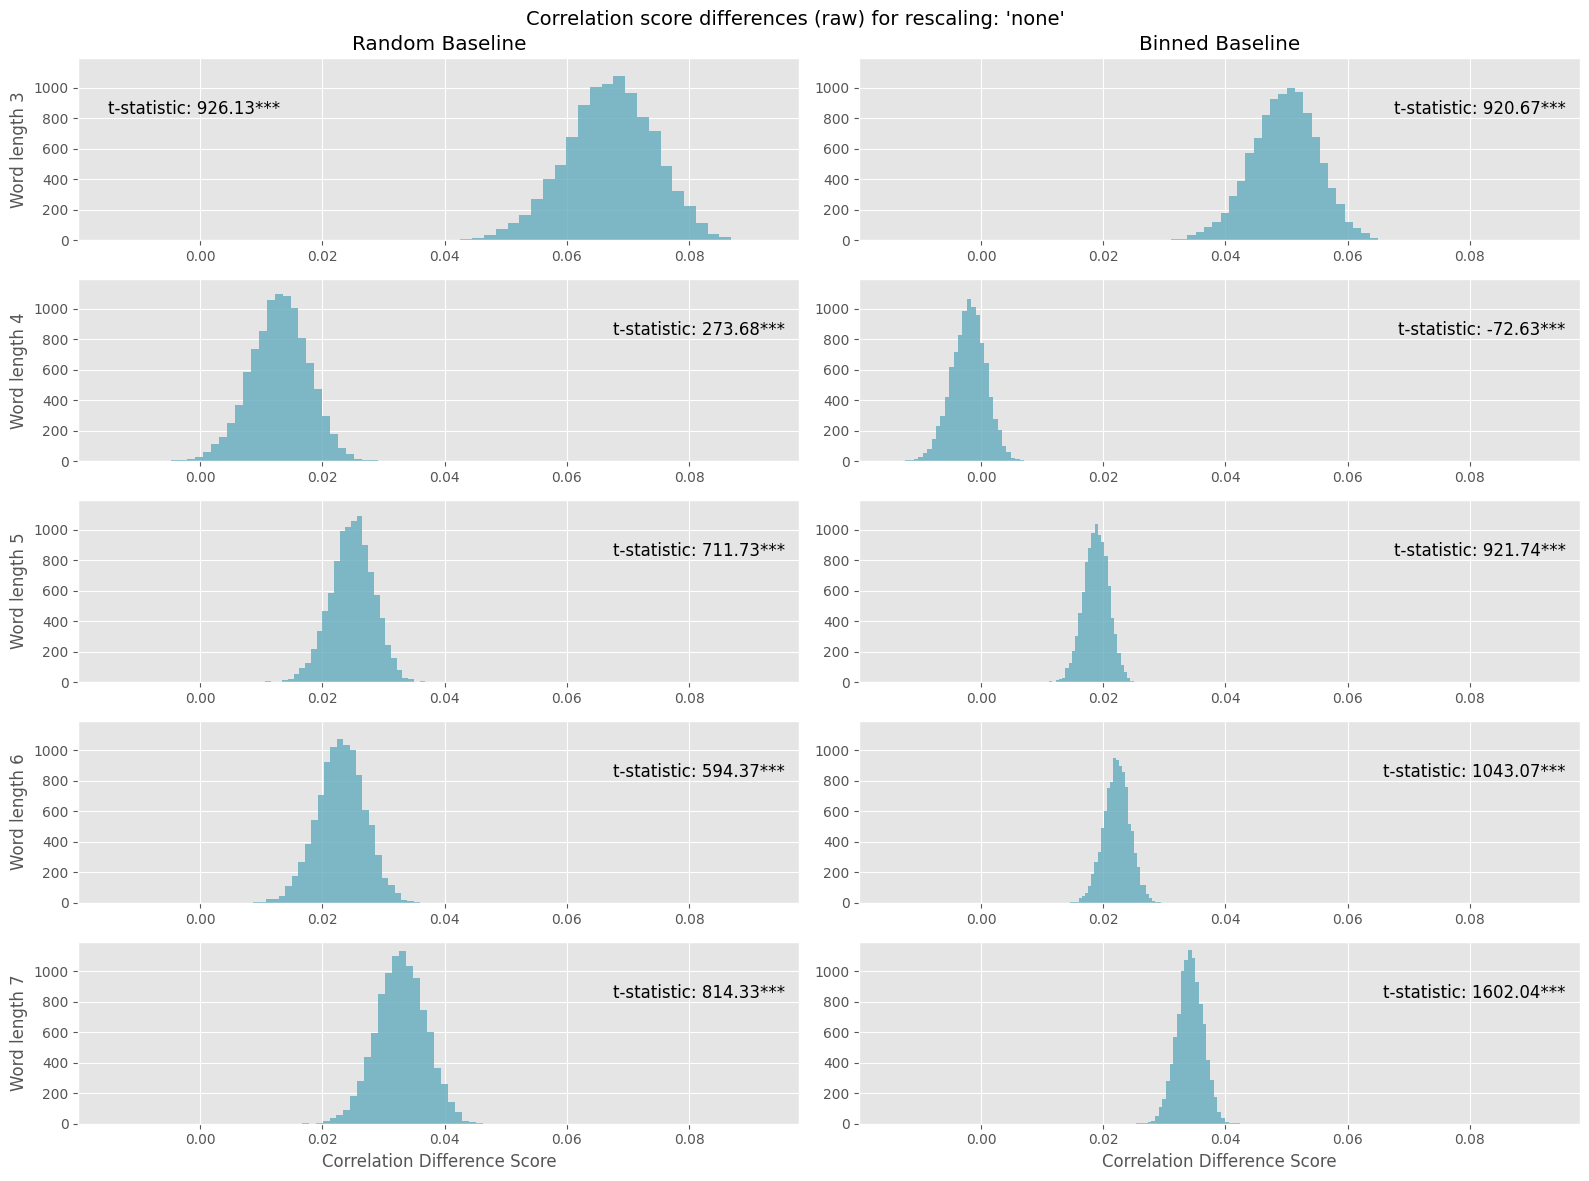

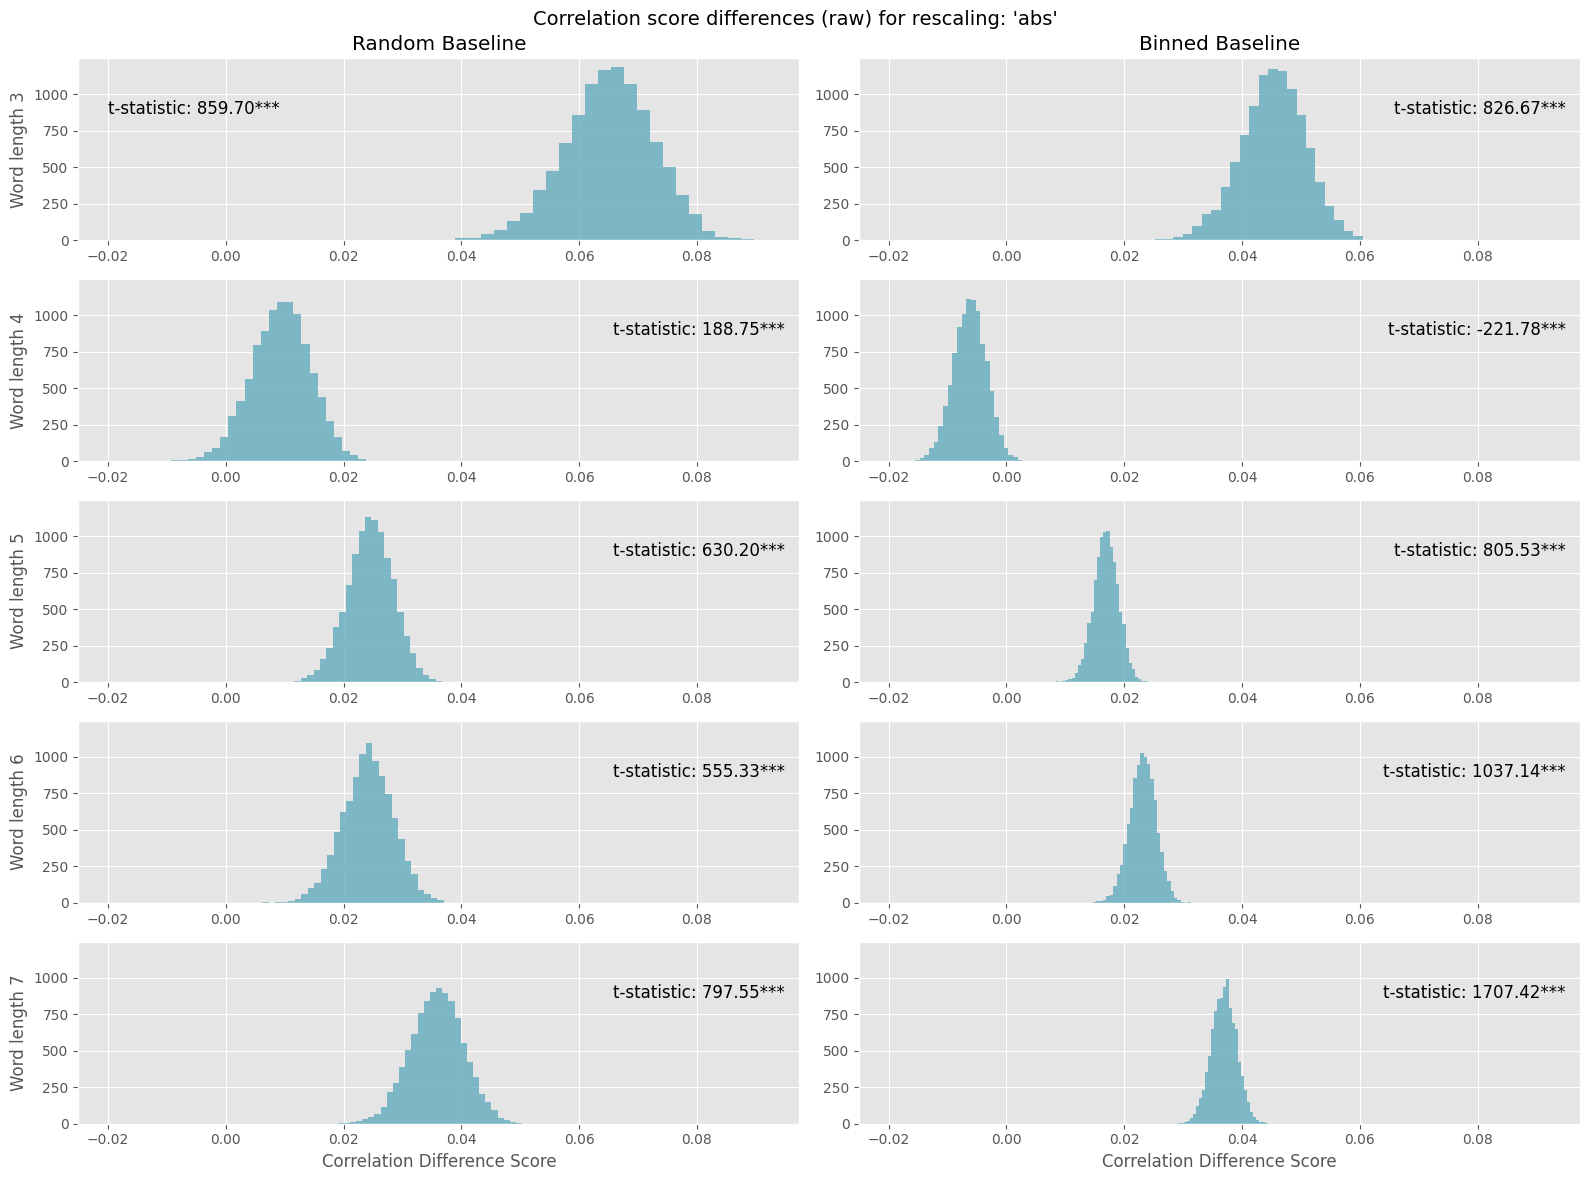

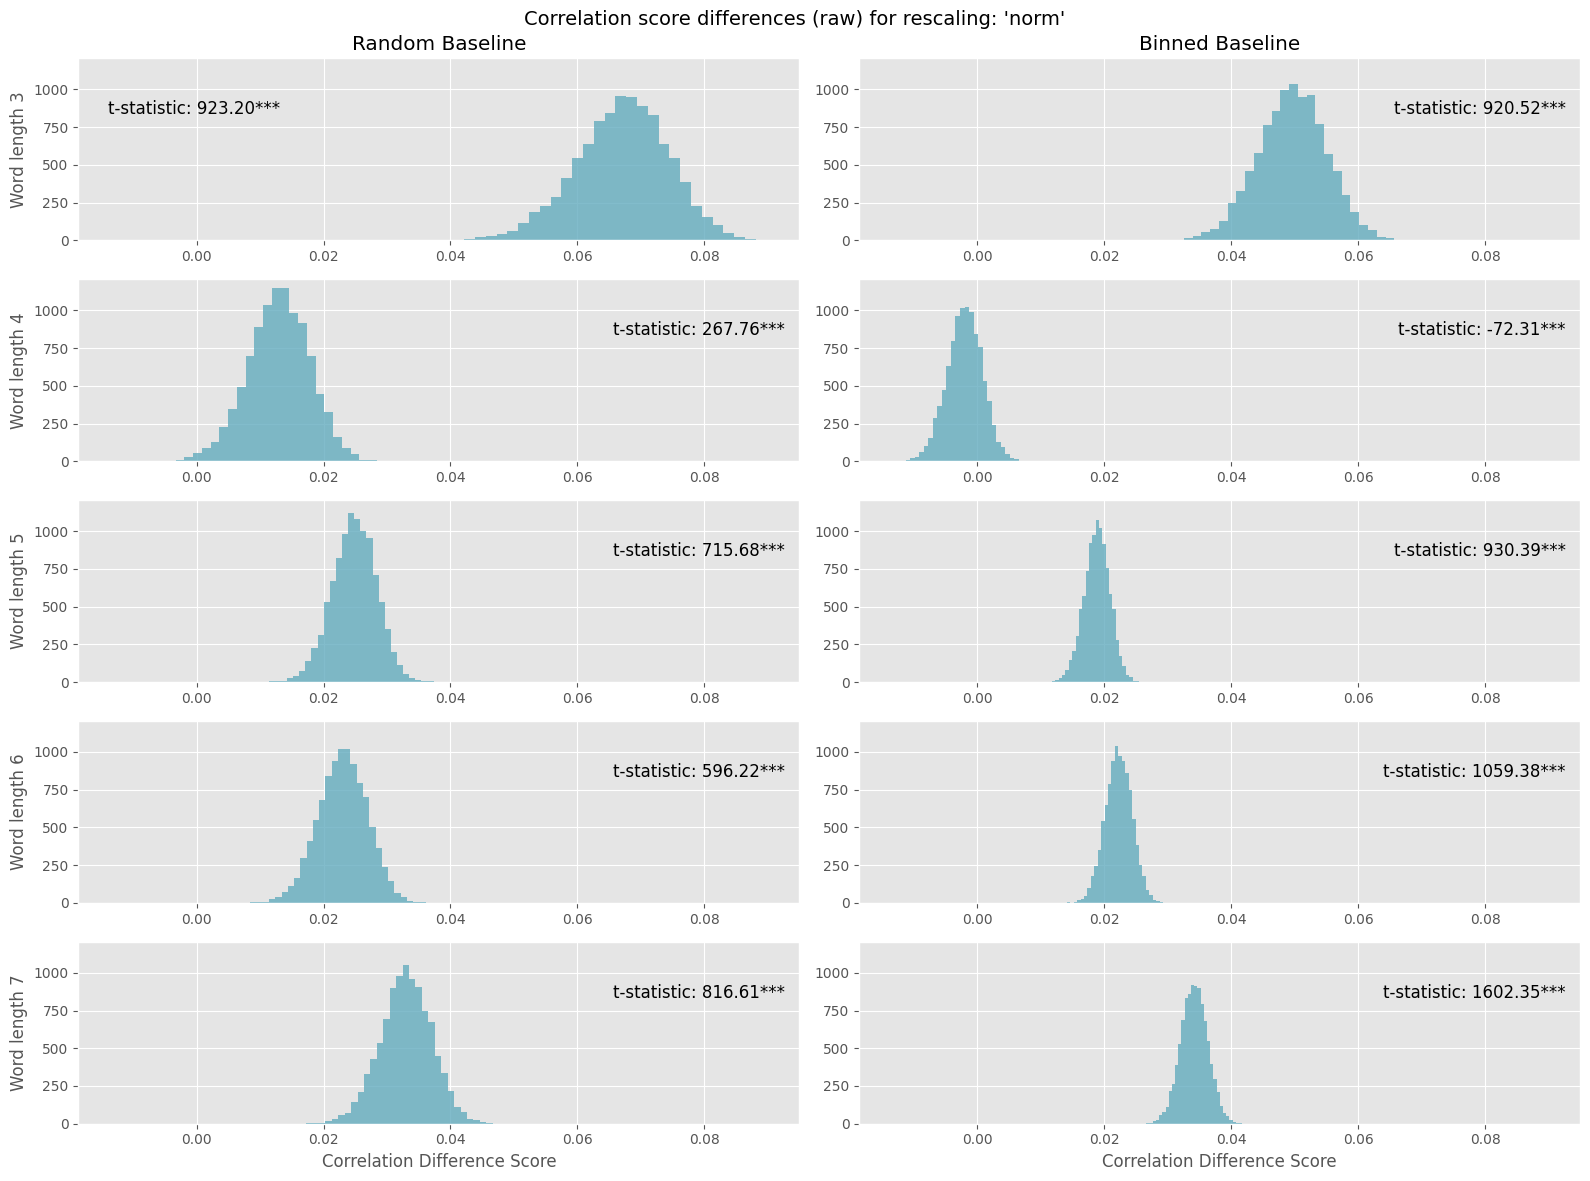

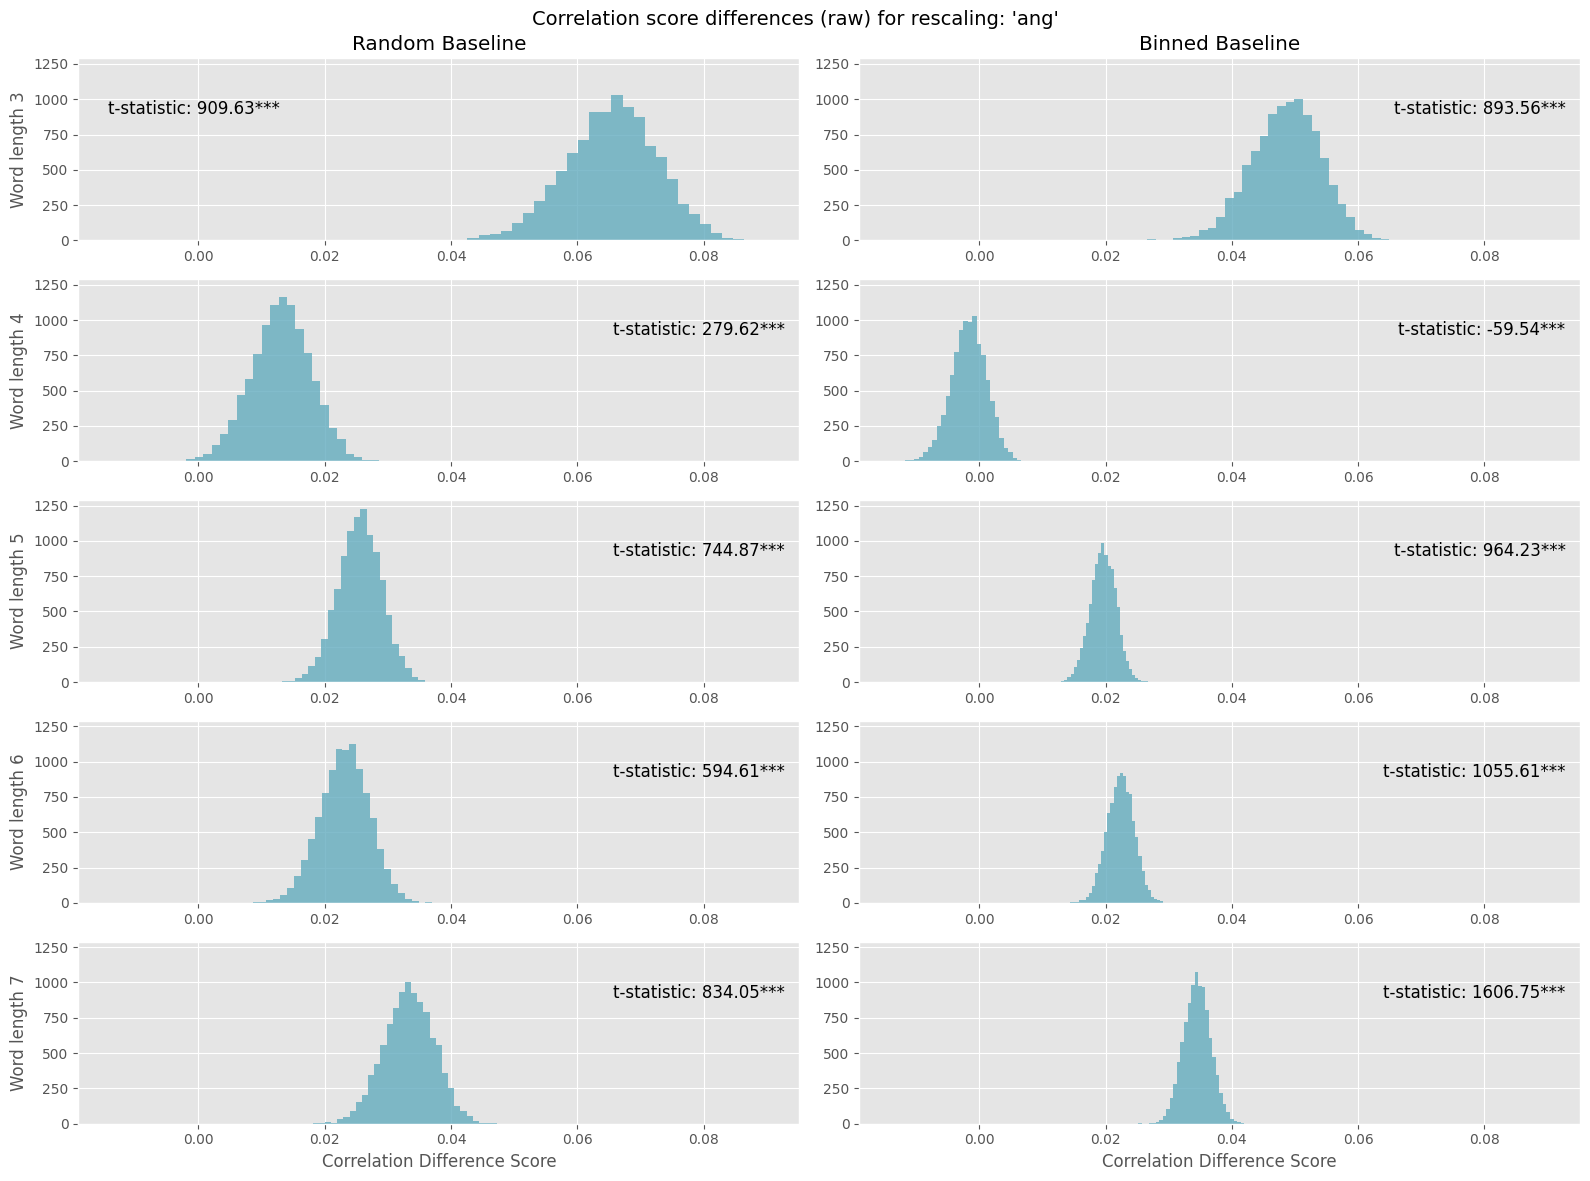

In [37]:
# Function to compute histogram of correlation differences
def hist_corr_diff(diff_scores_df, rescaling, corr_type, baselines_to_plot=['rd'], savefig=False, output_file_path=None):
    # Define the word lengths to consider
    word_lengths = [3, 4, 5, 6, 7]

    # Number of columns in the subplot grid (based on number of baselines to plot)
    ncols = len(baselines_to_plot)

    # Create a grid of subplots (1 row for each word length, and columns for each baseline)
    fig, axes = plt.subplots(nrows=len(word_lengths), ncols=ncols, figsize=(8 * ncols, 12), sharex=True, sharey=True)
    fig.suptitle(f"Correlation score differences ({corr_type}) for rescaling: '{rescaling}'", fontsize=14)

    # Iterate through each word length
    for i, word_length in enumerate(word_lengths):
        for j, baseline in enumerate(baselines_to_plot):
            # Filter the DataFrame based on word length and baseline
            filtered_df = diff_scores_df[(diff_scores_df['word_length'] == word_length) & (diff_scores_df['baseline'] == baseline)]
            
            # Choose the correct correlation difference column based on corr_type argument
            if corr_type == 'raw':
                differences = filtered_df['raw_corr_diff'].tolist()
            elif corr_type == 'transformed':
                differences = filtered_df['transformed_corr_diff'].tolist()
            else:
                raise ValueError("Invalid corr_type. Please specify either 'raw' or 'transformed'.")

            # Perform one-sample t-test against zero
            t_statistic, p_value = scipy.stats.ttest_1samp(differences, 0)

            # Plot the histogram
            # sns.histplot(differences, kde=True, bins=30, color='#63acbe', ax=axes[i, j])
            axes[i,j].hist(differences, bins=30, color='#63acbe', alpha=0.8)

            # Add significance markers based on the p-value
            if p_value < 0.05:
                significance_level = '*' if p_value >= 0.01 else '**' if p_value >= 0.001 else '***'
                text_string = f"t-statistic: {t_statistic:.2f}{significance_level}"
                # Display the text in the top right corner of the subplot
                if i== j == 0:
                    x_text = 0.28
                else:
                    x_text = 0.98
                axes[i, j].text(x_text, 0.72, text_string, fontsize=12, ha='right', va='center', transform=axes[i, j].transAxes)
                
            # Set title and labels for each subplot
            if i == 0:
                baseline_string = 'Random' if baseline == 'rd' else 'Binned'
                axes[i, j].set_title(f'{baseline_string} Baseline')
            if i == len(word_lengths) - 1:
                axes[i, j].set_xlabel('Correlation Difference Score')
            if j == 0:
                axes[i, j].set_ylabel(f'Word length {word_length}')
            axes[i, j].tick_params(axis='x', labelbottom=True)
            axes[i, j].tick_params(axis='y', labelleft=True)
    
    # fig.text(-0.01, 0.5, 'Number of Difference Scores', va='center', rotation='vertical', fontsize=12)
    
    # Adjust layout and display/save the plot
    plt.tight_layout()
    if savefig:
        plt.savefig(output_file_path)
    else:
        plt.show()

# Example usage
files_dir = os.path.join("results", "corr_diffs")

# Define file paths for each rescaling type
rescaling_to_files = {
    'none': os.path.join(files_dir, 'corr_diffs_none.csv'),
    'abs': os.path.join(files_dir, 'corr_diffs_abs.csv'),
    'norm': os.path.join(files_dir, 'corr_diffs_norm.csv'),
    'ang': os.path.join(files_dir, 'corr_diffs_ang.csv')
}

# Output directory for plots
output_dir = os.path.join("results", "corr_diffs", "plots")
os.makedirs(output_dir, exist_ok=True)

# Iterate through each rescaling type and specify baselines to plot
for rescaling, file in rescaling_to_files.items():
    df = pd.read_csv(file)
    # Specify which baselines to plot
    baselines_to_plot = ['rd', 'binned']
    # Define the correlation type
    corr_type = 'raw'  # Set to 'raw' or 'transformed'
    # Define the output file path
    output_filename = f"hist_corr_diffs_{rescaling}_{corr_type}.png"
    output_file_path = os.path.join(output_dir, output_filename)
    hist_corr_diff(df, rescaling, corr_type, baselines_to_plot, savefig=True, output_file_path=output_file_path)


In [39]:
# Function for 2-tailed t-tests (or Wilcoxon tests) for both versions of correlation differences (raw and transformed)
# Are means of distributions of differences between real and baseline correlation scores different from 0?

def analyze_differences_with_stats(baseline):
    # Define variables
    word_lengths = [3, 4, 5, 6, 7]
    rescaling_types = ['none', 'abs', 'norm', 'ang']
    stats_dict = {rescaling: {word_length: {} for word_length in word_lengths} for rescaling in rescaling_types}

    # Lists for storing p-values for raw and transformed differences
    raw_p_values = []
    transformed_p_values = []

    # Iterate through each rescaling type
    for rescaling in rescaling_types:
        # Read the differences data file for the current rescaling type
        diffs_file = os.path.join("results", "corr_diffs", f"corr_diffs_{rescaling}.csv")
        df = pd.read_csv(diffs_file)

        # Iterate through each word length
        for word_length in word_lengths:
            # Filter the DataFrame for the current word length and baseline
            filtered_df = df[(df['word_length'] == word_length) & (df['baseline'] == baseline)]

            # Extract raw and transformed correlation differences
            raw_differences = filtered_df['raw_corr_diff'].tolist()
            transformed_differences = filtered_df['transformed_corr_diff'].tolist()

            # Analyze raw differences
            raw_mean = np.mean(raw_differences)
            raw_std = np.std(raw_differences)
            is_raw_not_normal = scipy.stats.normaltest(raw_differences).pvalue < 0.05
            if is_raw_not_normal:
                raw_test_statistic = 'wilcox'
                raw_score, raw_p_value = scipy.stats.wilcoxon(raw_differences)
            else:
                raw_test_statistic = 't'
                raw_score, raw_p_value = scipy.stats.ttest_1samp(raw_differences, 0)
                
            # Analyze transformed differences
            transformed_mean = np.mean(transformed_differences)
            transformed_std = np.std(transformed_differences)
            
            # Check if distribution differs from normal and apply suitable test
            is_transformed_not_normal = scipy.stats.normaltest(transformed_differences).pvalue < 0.05
            if is_transformed_not_normal:
                # If distribution is not normal, use Wilcoxon signed-rank test
                transformed_test_statistic = 'wilcox'
                transformed_score, transformed_p_value = scipy.stats.wilcoxon(transformed_differences)
            else:
                # If distribution is normal, use t-test
                transformed_test_statistic = 't'
                transformed_score, transformed_p_value = scipy.stats.ttest_1samp(transformed_differences, 0)
            # Store results in stats_dict
            stats_dict[rescaling][word_length] = {
                'raw': {
                    'mean': raw_mean,
                    'std': raw_std,
                    'test_statistic': raw_test_statistic,
                    'score': raw_score,
                    'p': raw_p_value
                },
                'transformed': {
                    'mean': transformed_mean,
                    'std': transformed_std,
                    'test_statistic': transformed_test_statistic,
                    'score': transformed_score,
                    'p': transformed_p_value
                }
            }

            # Add raw and transformed p-values to their respective lists
            raw_p_values.append(raw_p_value)
            transformed_p_values.append(transformed_p_value)

    # Apply Bonferroni correction for multiple comparisons separately for raw and transformed differences
    adjusted_raw_p_values = multipletests(raw_p_values, method='bonferroni')[1]
    adjusted_transformed_p_values = multipletests(transformed_p_values, method='bonferroni')[1]

    # Define file path for saving test results
    t_stats_path = os.path.join('results', 'ttests', f't_tests_{baseline}.csv')
    os.makedirs(os.path.dirname(t_stats_path), exist_ok=True)

    # Write the test results to a CSV file
    with open(t_stats_path, 'w', newline='', encoding='utf-8') as f:
        csv_writer = csv.writer(f)
        # Write the header
        csv_writer.writerow(['word_length', 'rescaling', 'raw_mean', 'raw_std', 'raw_test_statistic', 'raw_score', 'raw_adjusted_pvalue', 'transformed_mean', 'transformed_std', 'transformed_test_statistic', 'transformed_score', 'transformed_adjusted_pvalue'])

        # Write the results data
        index = 0
        for rescaling in rescaling_types:
            for word_length in word_lengths:
                raw_mean = stats_dict[rescaling][word_length]['raw']['mean']
                raw_std = stats_dict[rescaling][word_length]['raw']['std']
                raw_test_stat = stats_dict[rescaling][word_length]['raw']['test_statistic']
                raw_score = stats_dict[rescaling][word_length]['raw']['score']
                raw_adj_p = adjusted_raw_p_values[index]

                transformed_mean = stats_dict[rescaling][word_length]['transformed']['mean']
                transformed_std = stats_dict[rescaling][word_length]['transformed']['std']
                transformed_test_stat = stats_dict[rescaling][word_length]['transformed']['test_statistic']
                transformed_score = stats_dict[rescaling][word_length]['transformed']['score']
                transformed_adj_p = adjusted_transformed_p_values[index]

                csv_writer.writerow([
                    word_length, rescaling,
                    raw_mean, raw_std, raw_test_stat, raw_score, raw_adj_p,
                    transformed_mean, transformed_std, transformed_test_stat, transformed_score, transformed_adj_p
                ])

                index += 1

In [40]:
baselines = ['rd', 'binned']
for baseline in baselines:
    analyze_differences_with_stats(baseline)

# Boxplot of reassigned raw correlations

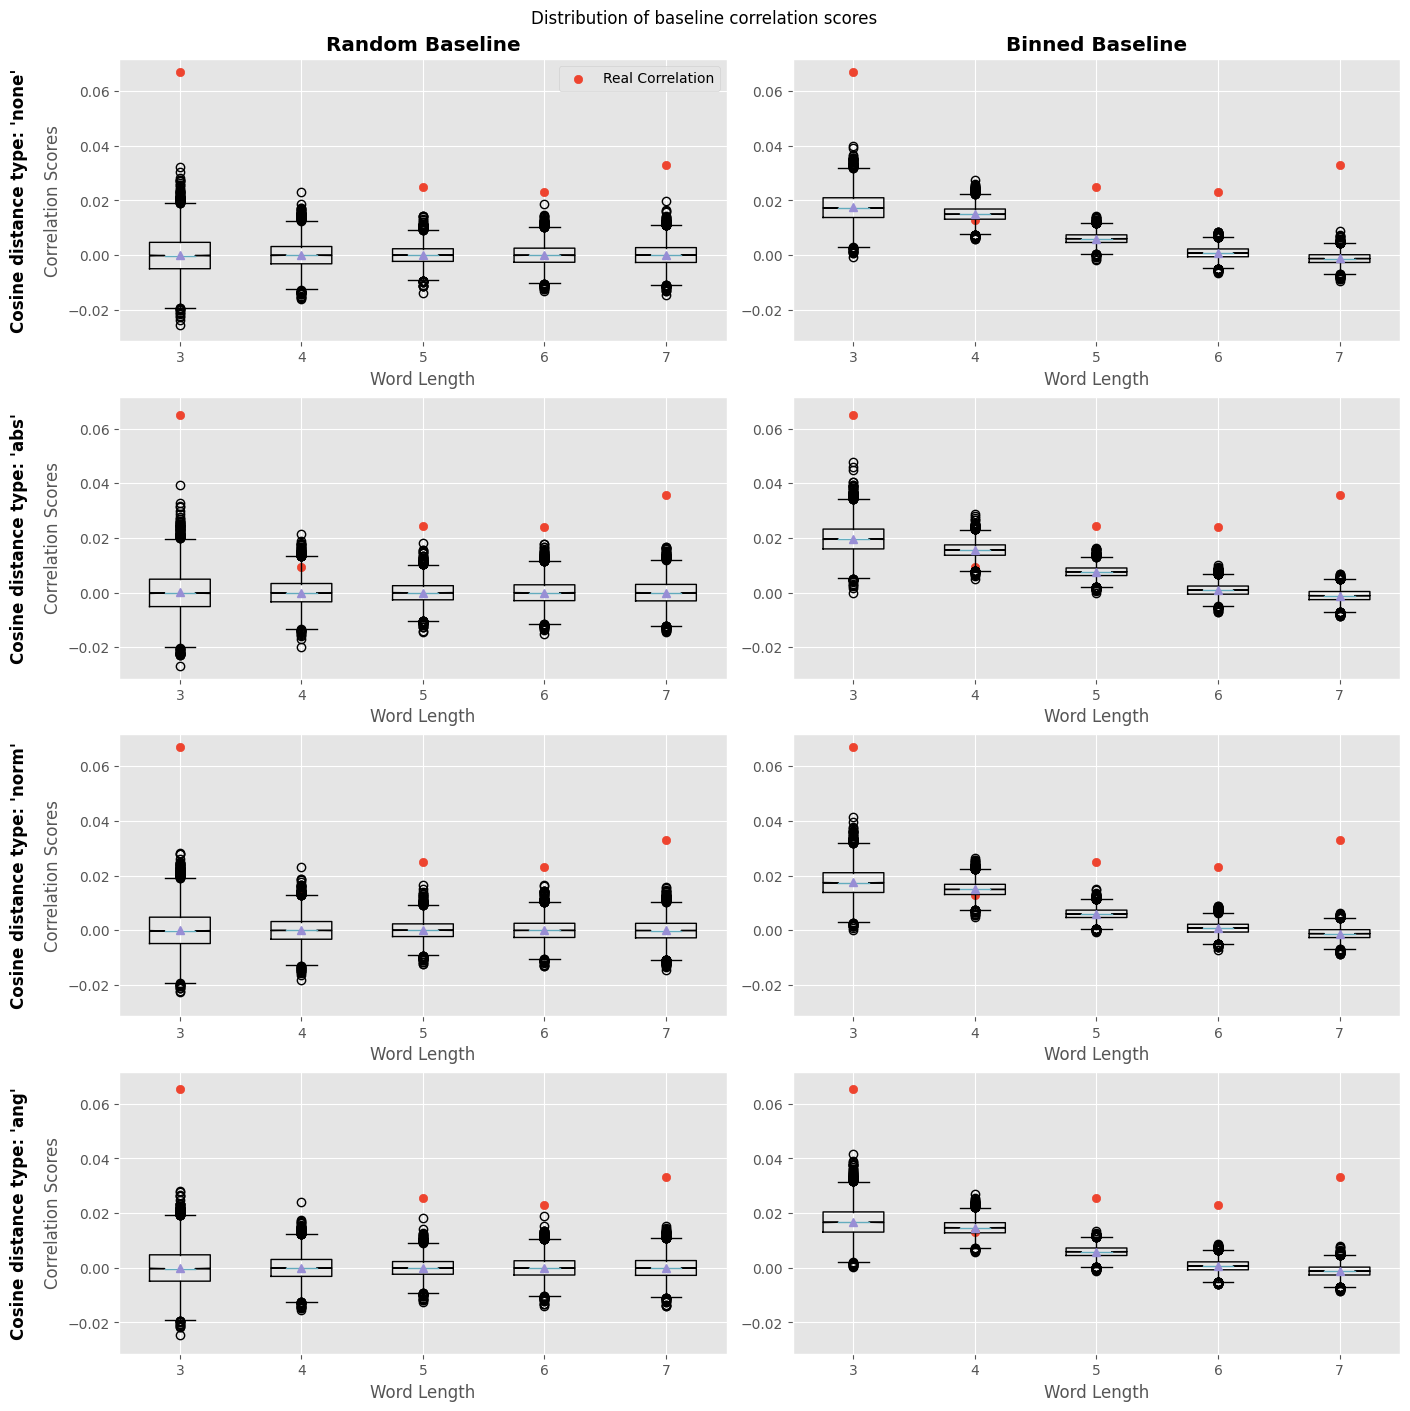

In [44]:
def boxplot_baseline_corrs(corr_type):
    corr_type_options = ['raw_corr', 'transformed_corr']
    if corr_type not in corr_type_options:
        raise ValueError(f"Invalid corr_type. Accepted values: {corr_type_options}")
    
    word_lengths = [3,4,5,6,7]
    rescaling_types = ['none', 'abs', 'norm', 'ang']
    baseline_types = ['Random Baseline', 'Binned Baseline']

    real_scores_files = {rescaling: f'results/correlations/real_corr_scores/real_corrs_{rescaling}.csv' for rescaling in rescaling_types}
    random_baseline_files = {rescaling: f'results/correlations/rd_baseline/rd_bl_corrs_{rescaling}.csv' for rescaling in rescaling_types}
    binned_baseline_files = {rescaling: f'results/correlations/bin_baseline/bin_bl_corrs_{rescaling}.csv' for rescaling in rescaling_types}

    # Number of rows corresponds to rescaling types, and columns correspond to baselines
    num_rows = len(rescaling_types)
    num_cols = len(baseline_types) 

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 14), sharey=True, constrained_layout=True)
    fig.suptitle(f'Distribution of baseline correlation scores')

    # Set column headers for the baseline types
    for col, baseline_type in enumerate(baseline_types):
        axs[0, col].set_title(baseline_type, fontweight='bold')

    # Iterate through each rescaling type (rows) and baseline (columns)
    for row, rescaling in enumerate(rescaling_types):
        # Add rescaling type as the row header on the first subplot in the row
        axs[row, 0].annotate(
            f"Cosine distance type: '{rescaling}'",
            xy=(-0.15, 0.5),
            xycoords='axes fraction',
            fontsize=12,
            fontweight='bold',
            ha='right',
            va='center',
            rotation=90
        )
        
        for col, baseline_type in enumerate(baseline_types):
            # Get the appropriate baseline file for the current rescaling type
            if baseline_type == 'Random Baseline':
                scores_df = pd.read_csv(random_baseline_files[rescaling])
            elif baseline_type == 'Binned Baseline':
                scores_df = pd.read_csv(binned_baseline_files[rescaling])
            
            # Read real correlation scores from the real scores file
            real_scores_df = pd.read_csv(real_scores_files[rescaling])
            
            # Extract correlation scores for each word length
            bl_corrs_per_wordlength = {}
            real_corrs_per_wordlength = {}
            for word_length in word_lengths:
                # Extract baseline correlation scores for each word length
                bl_corrs = scores_df[scores_df['word_length'] == word_length]['raw_corr'].tolist()
                bl_corrs_per_wordlength[word_length] = bl_corrs
                # Extract real correlation scores for each word length
                real_corr = real_scores_df.loc[real_scores_df['word_length'] == word_length, corr_type].values
                # If found, assign the value to real_corrs_per_wordlength
                if len(real_corr) > 0:
                    real_corrs_per_wordlength[word_length] = real_corr[0]
                else:
                    # If not found, set to None
                    real_corrs_per_wordlength[word_length] = None
            
            # Plot the real correlation scores
            axs[row, col].scatter(real_corrs_per_wordlength.keys(), real_corrs_per_wordlength.values(), color='#ee442f', label='Real Correlation')
            
            # Plot boxplot for the current rescaling type and baseline
            axs[row, col].boxplot(bl_corrs_per_wordlength.values(), notch=True, positions=word_lengths, showmeans=True, medianprops={'color': '#63acbe'})
            
            # Add a legend for the real correlation scores
            if row == col == 0:
                axs[row, col].legend()
            
            # Add labels to subplot
            axs[row, col].set_xlabel('Word Length')
            # Add y-label to the first column
            if col == 0:  
                axs[row, col].set_ylabel('Correlation Scores')
            axs[row, col].grid(True)
            
            # Ensure y-tick labels are visible on each subplot
            axs[row, col].tick_params(axis='y', labelleft=True)

    # Show the figure with all subplots
    plt.show()

boxplot_baseline_corrs('raw_corr')